In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
# Lin Reg
from sklearn.linear_model import LinearRegression
# Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machine
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Log Reg
from sklearn.linear_model import LogisticRegression
# GridSearchCv for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

In [2]:
df = pd.read_csv('adm_data.csv')
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [4]:
df.describe

<bound method NDFrame.describe of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Ch

In [5]:
df.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chan

<AxesSubplot: >

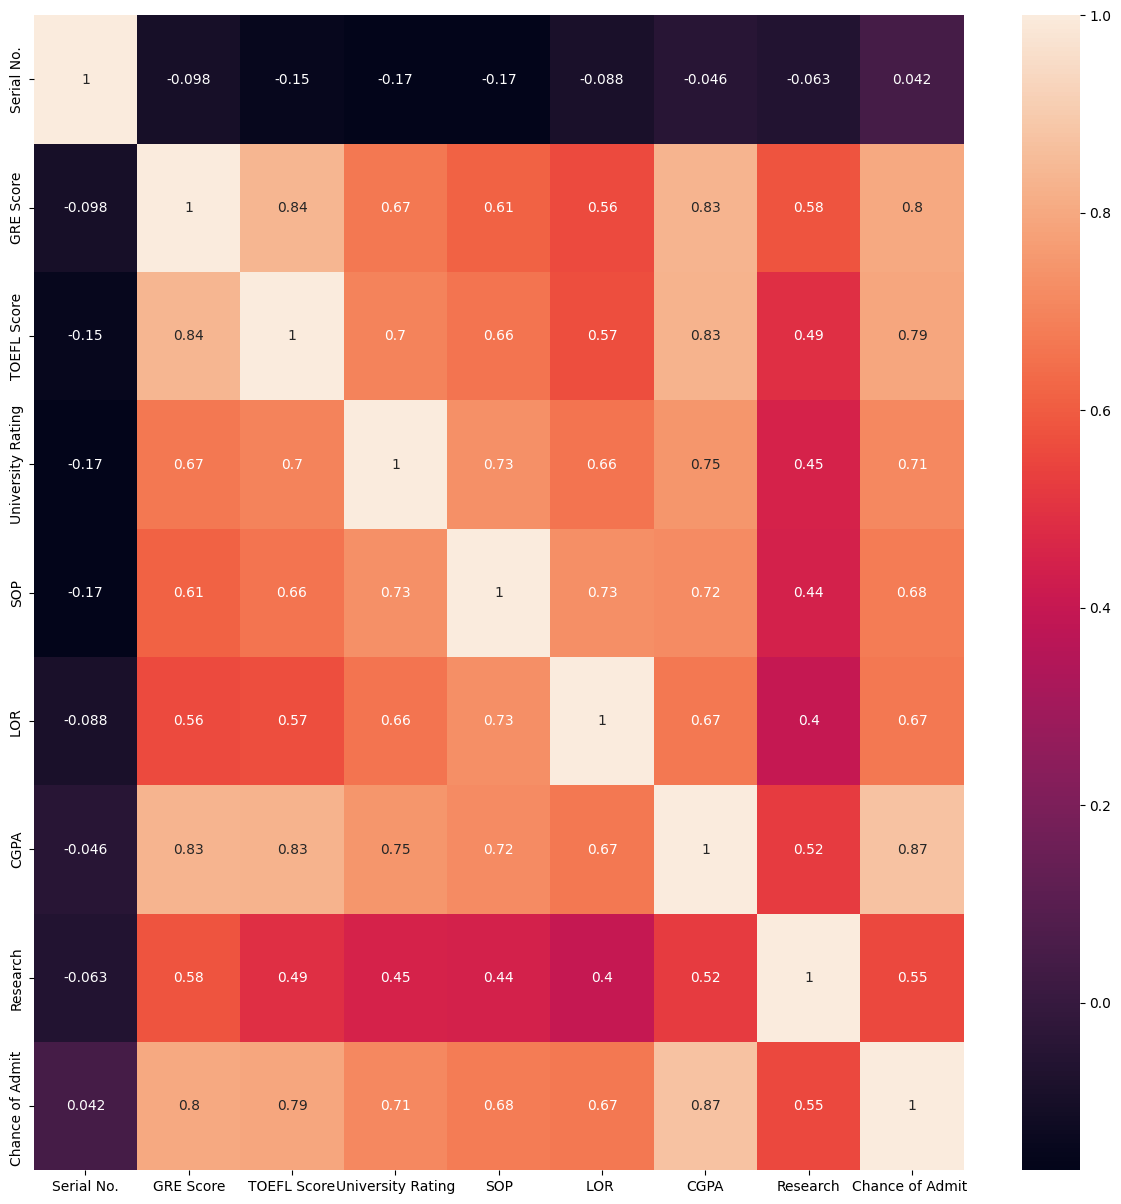

In [6]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [7]:
list = corr['Chance of Admit '].sort_values(ascending=True)
list

Serial No.           0.042336
Research             0.553202
LOR                  0.669889
SOP                  0.675732
University Rating    0.711250
TOEFL Score          0.791594
GRE Score            0.802610
CGPA                 0.873289
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

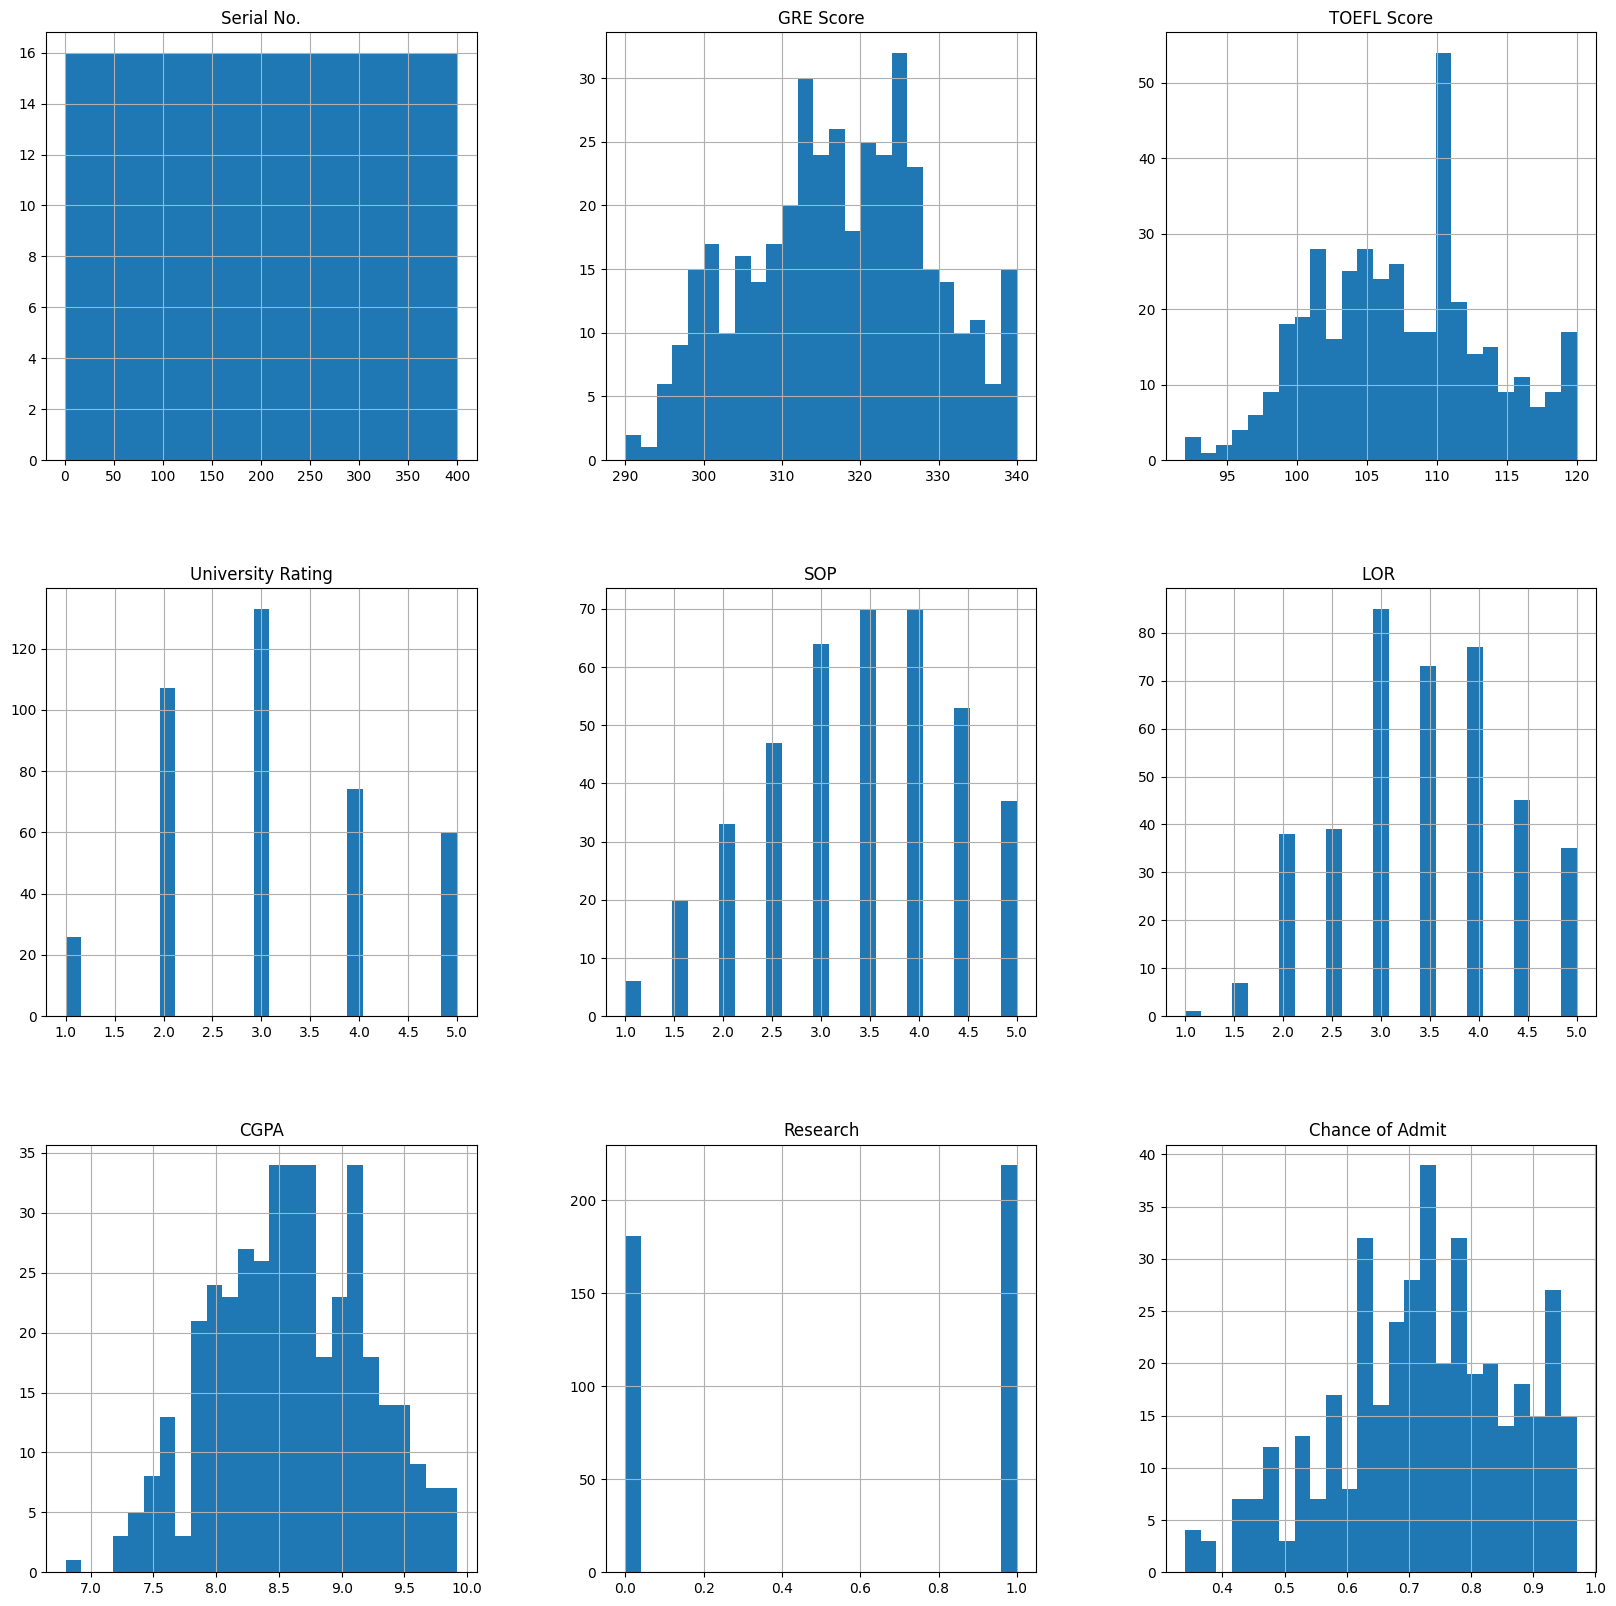

In [8]:
df.hist(bins = 25, figsize = (20,20))
plt.show()

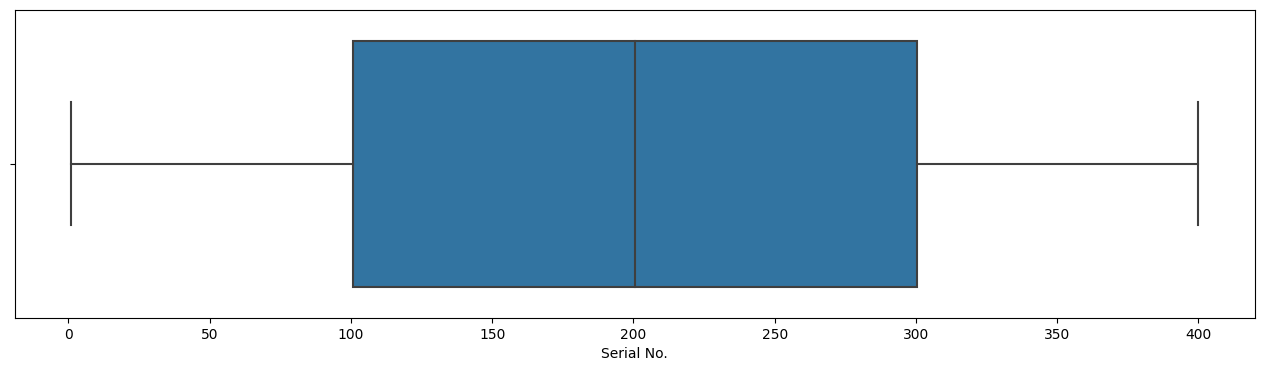

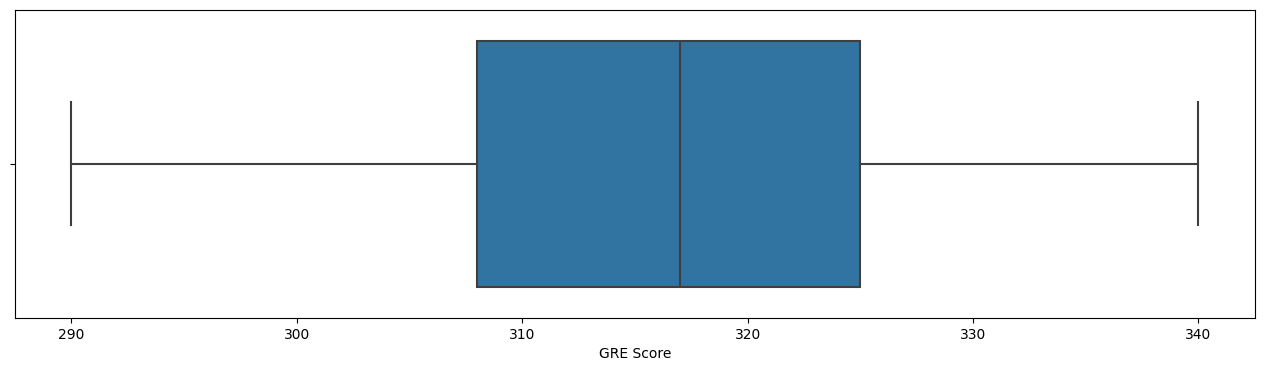

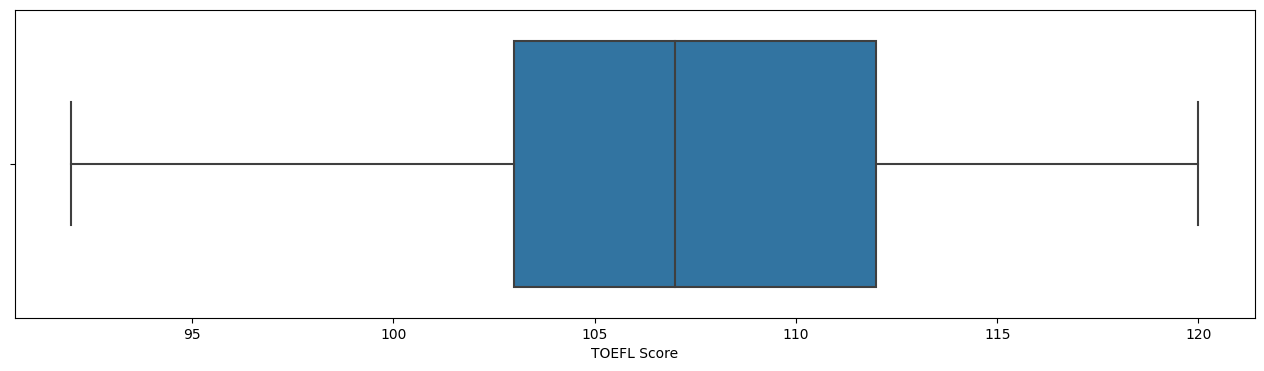

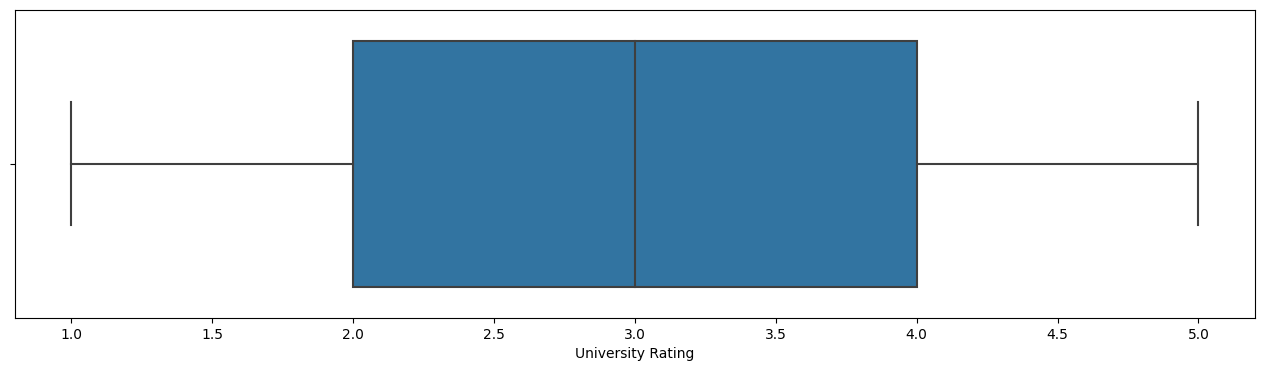

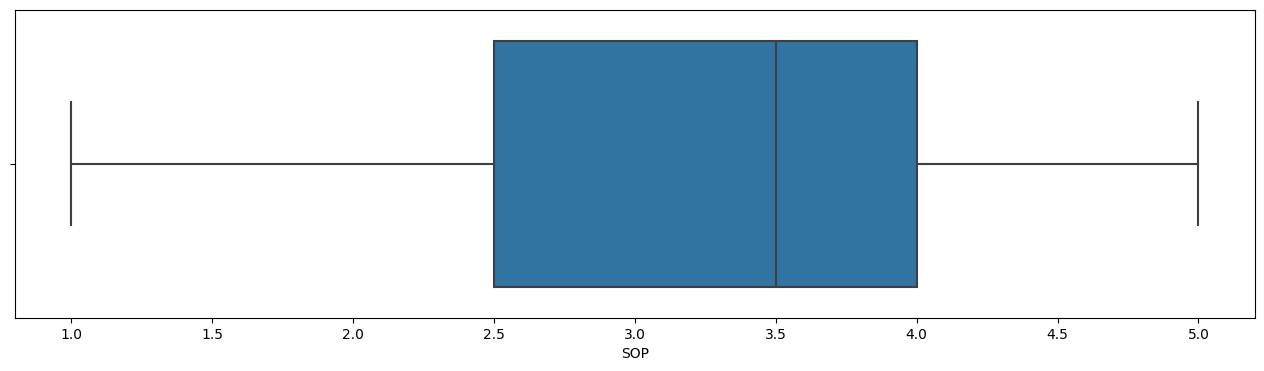

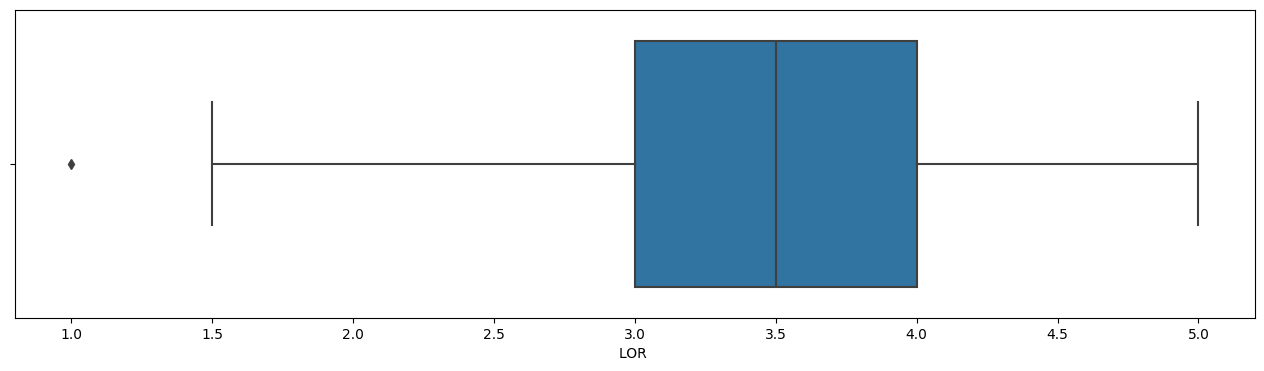

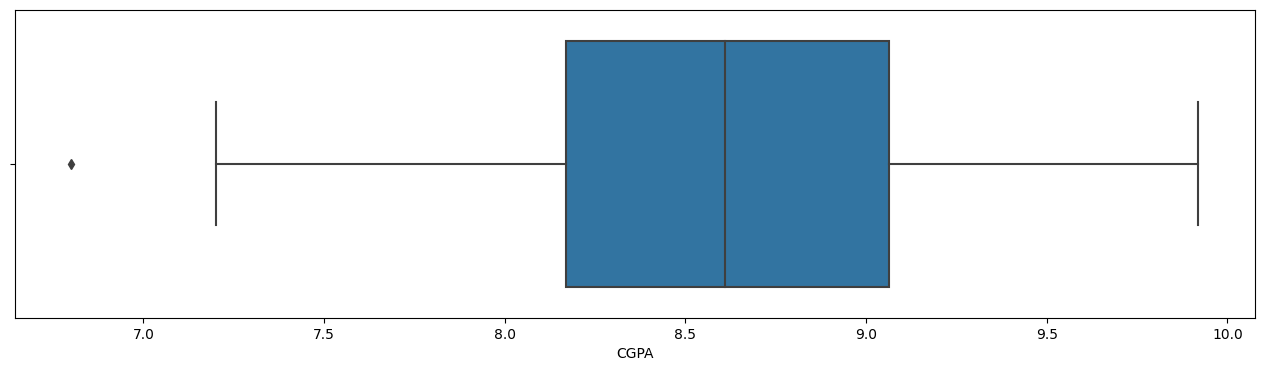

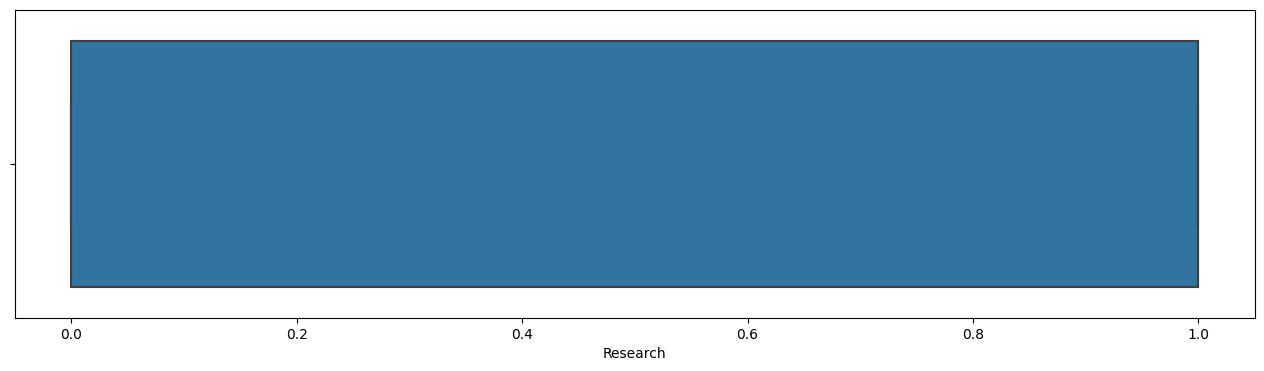

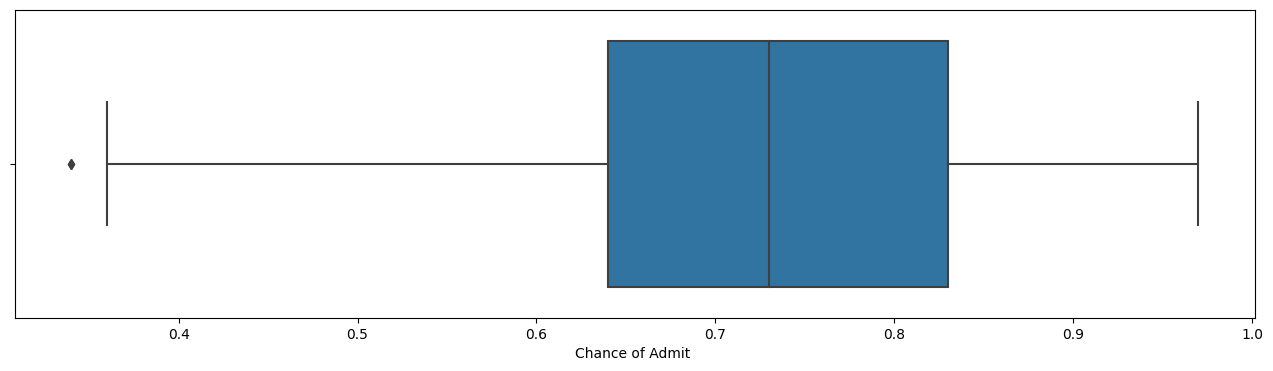

In [9]:
for column in df:
    plt.figure(figsize=(16, 4))
    sns.boxplot(data = df, x = column)

In [10]:
totalMissing = df.isna().sum().sort_values()
missingData = pd.concat([totalMissing], axis=1, keys=["Total"])
missingData.head(15)

,Total
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Data Cleaning and Filtering

In [11]:
train = df.drop(['Serial No.'], axis = 1)
train.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Training Set

In [12]:
Y = df['Chance of Admit ']
X = df.drop(['Chance of Admit '], axis = 1)
print(X.shape, Y.shape)

(400, 8) (400,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print("Train: ", X_train.shape, Y_train.shape)
print("Test: ", X_test.shape, Y_test.shape)

Train:  (300, 8) (300,)
Test:  (100, 8) (100,)


In [21]:
print(Y_train)

52     0.78
261    0.71
381    0.73
157    0.65
340    0.75
       ... 
253    0.93
38     0.52
11     0.84
208    0.64
91     0.38
Name: Chance of Admit , Length: 300, dtype: float64


In [19]:
def plotConfusionMatrix(y, ypred):
    CM = confusion_matrix(y, ypred)
    sns.heatmap(CM, annot=True)
    plt.show()
    TP = CM[1][1]
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    print('Precision: ', precision)
    print('Recall: ', recall)
    return(precision, recall)

In [22]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [29]:
# Linear
svml = SVR(kernel = 'linear')
svml.fit(X_train, Y_train)
acc1 = (svml.score(X_test, Y_test))

# Poly
svmp = SVR(kernel = 'poly', degree=3)
svmp.fit(X_train, Y_train)
acc2 = (svmp.score(X_test, Y_test))

# RBF
svmr = SVR(kernel = 'rbf')
svmr.fit(X_train, Y_train)
acc3 = (svmr.score(X_test, Y_test))



In [30]:
d = {'Kernel': ['Lin', 'Pol', 'RBF'], 'Accuracy': [acc1, acc2, acc3]}
kernel = pd.DataFrame(data = d)
kernel

,Kernel,Accuracy
0,Lin,0.776927
1,Pol,0.638739
2,RBF,0.571136


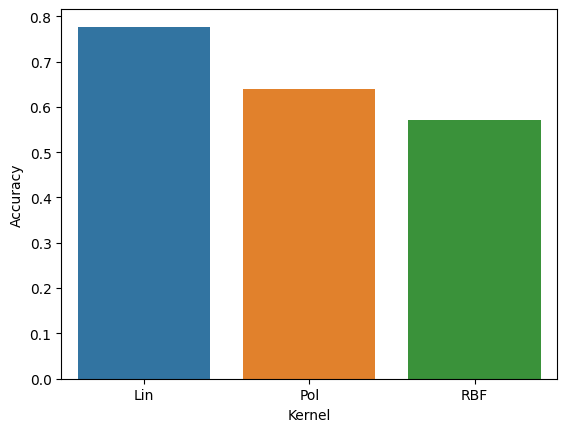

In [31]:
sns.barplot(data = kernel, x = 'Kernel', y = 'Accuracy')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()